Data Science - 1st homework assignment

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

1. Load the dataset student_score.csv. When loading the dataset watch out for the index column.

In [2]:
# loading the dataframe
df = pd.read_csv ("students_score.csv")
df

Unnamed: 0  StudentId  Gender EthnicGroup          ParentEduc  \
0               0     520645  female         NaN   bachelor's degree   
1               1     303683  female     group C        some college   
2               2     457351  female     group B     master's degree   
3               3     812988    male     group A  associate's degree   
4               4     594678    male     group C        some college   
...           ...        ...     ...         ...                 ...   
30636         816     611241  female     group D         high school   
30637         890     299810    male     group E         high school   
30638         911     941589  female         NaN         high school   
30639         934     867225  female     group D  associate's degree   
30640         960     649362    male     group B        some college   

          LunchType   TestPrep ParentMaritalStatus PracticeSport IsFirstChild  \
0          standard       none             married     regularly          yes   
1          standard        NaN             married     sometimes          yes   
2          standard       none              single     sometimes          yes   
3      free/reduced       none             married         never           no   
4          standard       none             married     sometimes          yes   
...             ...        ...                 ...           ...          ...   
30636      standard       none              single     sometimes           no   
30637      standard       none              single     regularly           no   
30638  free/reduced  completed             married     sometimes           no   
30639      standard  completed             married     regularly           no   
30640      standard       none             married         never           no   

       NrSiblings TransportMeans WklyStudyHours  MathScore  ReadingScore  \
0             3.0     school_bus            < 5         71            71   
1             0.0            NaN         5 - 10         69            90   
2             4.0     school_bus            < 5         87            93   
3             1.0            NaN         5 - 10         45            56   
4             0.0     school_bus         5 - 10         76            78   
...           ...            ...            ...        ...           ...   
30636         2.0     school_bus         5 - 10         59            61   
30637         1.0        private         5 - 10         58            53   
30638         1.0        private         5 - 10         61            70   
30639         3.0     school_bus         5 - 10         82            90   
30640         1.0     school_bus         5 - 10         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
30636            65  
30637            51  
30638            67  
30639            93  
30640            58  

[30641 rows x 16 columns]

In [3]:
#  "watching out" for the index column
df.drop ("Unnamed: 0", axis=1, inplace = True)

In [4]:
df

StudentId  Gender EthnicGroup          ParentEduc     LunchType  \
0         520645  female         NaN   bachelor's degree      standard   
1         303683  female     group C        some college      standard   
2         457351  female     group B     master's degree      standard   
3         812988    male     group A  associate's degree  free/reduced   
4         594678    male     group C        some college      standard   
...          ...     ...         ...                 ...           ...   
30636     611241  female     group D         high school      standard   
30637     299810    male     group E         high school      standard   
30638     941589  female         NaN         high school  free/reduced   
30639     867225  female     group D  associate's degree      standard   
30640     649362    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none             married     regularly          yes         3.0   
1            NaN             married     sometimes          yes         0.0   
2           none              single     sometimes          yes         4.0   
3           none             married         never           no         1.0   
4           none             married     sometimes          yes         0.0   
...          ...                 ...           ...          ...         ...   
30636       none              single     sometimes           no         2.0   
30637       none              single     regularly           no         1.0   
30638  completed             married     sometimes           no         1.0   
30639  completed             married     regularly           no         3.0   
30640       none             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 15 columns]

2. Print the size of the dataset. List the number of examples and the number of features.

In [5]:
df.shape

(30641, 15)

3. Show the first 5 examples of the dataset.

In [6]:
df.head(5)

StudentId  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0     520645  female         NaN   bachelor's degree      standard     none   
1     303683  female     group C        some college      standard      NaN   
2     457351  female     group B     master's degree      standard     none   
3     812988    male     group A  associate's degree  free/reduced     none   
4     594678    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [7]:
third_example = df.iloc[2] #locating the third example
for ParentEduc, data_type in third_example.items(): 
    print(f"Feature: {ParentEduc}, Data type: {type(data_type).__name__}") # "type(data_type).__name__" is used to print the name of the type of the value

Feature: StudentId, Data type: int64
Feature: Gender, Data type: str
Feature: EthnicGroup, Data type: str
Feature: ParentEduc, Data type: str
Feature: LunchType, Data type: str
Feature: TestPrep, Data type: str
Feature: ParentMaritalStatus, Data type: str
Feature: PracticeSport, Data type: str
Feature: IsFirstChild, Data type: str
Feature: NrSiblings, Data type: float64
Feature: TransportMeans, Data type: str
Feature: WklyStudyHours, Data type: str
Feature: MathScore, Data type: int64
Feature: ReadingScore, Data type: int64
Feature: WritingScore, Data type: int64


5. For numerical features print the value of mean, standard deviation and median.

In [8]:
import statistics

In [9]:
# defining which columns need their values printed out
data = ["NrSiblings", "MathScore", "ReadingScore", "WritingScore"]

In [10]:
df[data].median()

NrSiblings       2.0
MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64

In [11]:
df[data].mean()

NrSiblings       2.147305
MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
dtype: float64

In [12]:
df[data].std()

NrSiblings       1.466746
MathScore       15.361616
ReadingScore    14.758952
WritingScore    15.443525
dtype: float64

6. Check if there are any monotonous attributes. If you find a monotonous attribute, remove it from the dataset.

In [13]:
# here StudentId is clearly monotonous so it's being dropped in the next line
df.nunique()

StudentId              30641
Gender                     2
EthnicGroup                5
ParentEduc                 6
LunchType                  2
TestPrep                   2
ParentMaritalStatus        4
PracticeSport              3
IsFirstChild              12
NrSiblings                11
TransportMeans             2
WklyStudyHours             3
MathScore                 95
ReadingScore              90
WritingScore              93
dtype: int64

In [14]:
df.drop(("StudentId"), axis=1, inplace=True)
df.head()

Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

7. Check the data for missing values. Print the number of missing values for each feature.

In [15]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values.

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

In [28]:
most_common_ethnic_group = df ["EthnicGroup"].mode()[0] # .mode() pulls the mode value of the specified column, [0] so it starts with the first one
df["EthnicGroup"].fillna(most_common_ethnic_group, inplace = True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

In [29]:
most_common_parent_marital_status = df ["ParentMaritalStatus"].mode()[0] # same as last
df["ParentMaritalStatus"].fillna(most_common_parent_marital_status, inplace = True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

In [30]:
most_common_weekly_study_hours = df ["WklyStudyHours"].mode()[0] # same as last
df["WklyStudyHours"].fillna(most_common_weekly_study_hours, inplace = True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

b)  For the feature ParentEduc replace NaN value with a string no formal education.

In [31]:
df["ParentEduc"].fillna("no formal education", inplace = True) # defining the string which replaces NaN values
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

c) For the feature TestPrep replace NaN value with a string none.

In [32]:
df["TestPrep"].fillna("none", inplace = True) # same as last, different string
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values.

In [33]:
df.dropna(subset = ["PracticeSport", "IsFirstChild"], inplace = True) # .dropna drops all NaN values from the defined subset
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

e) For the feature NrSiblings replace the NaN value with the median value.

In [34]:
median_NrSiblings = df["NrSiblings"].median() # using the same method as earlier (mode), using .median instead
df["NrSiblings"].fillna(median_NrSiblings, inplace=True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

f) Finally, for the feature TransportMeans replace the NaN value with a string walking.

In [35]:
df["TransportMeans"].fillna("walking", inplace = True) # same as ParentEduc and TestPrep
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values.

In [36]:
# checking for unique values to determine how many various replies were noted
unique_values = df["IsFirstChild"].unique()
print("Unique values in 'IsFirstChild':", unique_values)

Unique values in 'IsFirstChild': ['yes' 'no' 'nein' 'nope' 'ye' 'si' 'Yes' 'yeah' 'noo' 'ys' 'yeah boy'
 'es']


In [38]:
# replacing each of the previoulsy noted replies with "yes" or "no"
standard_representation = {"ye": "yes", "nein": "no"}, {"si": "yes", "nope": "no"}, {"Yes": "yes", "noo": "no"}, {"yeah": "yes"}, {"ys": "yes"}, {"yeah boy": "yes"}, {"es": "yes"}

df["IsFirstChild"].replace(standard_representation, inplace=True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female     group C   bachelor's degree      standard       none   
1      female     group C        some college      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female     group C         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1            walking         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3            walking         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[29117 rows x 14 columns]

10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables.

For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder.

In [39]:
# using OneHot Encoder for these features
onehot_cols = ["Gender", "LunchType"]

# using Label Encoder for these features
label_cols = ["EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans"]

numeric_features = df.select_dtypes(include="number") # selecting numeric features based on numeric dtypes

onehot_encoded = pd.get_dummies(df[onehot_cols], columns=onehot_cols) # converting categorical variables into dummies (0 or 1)

label_encoded = df[label_cols].apply(lambda x: pd.factorize(x)[0]) #pd.factorize() assigns unique integers to each unique value in a categorical column

df_transformed = pd.concat([onehot_encoded, label_encoded, numeric_features], axis=1) # concatenating the columns

df_transformed.head()

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0           True        False                   False                True   
1           True        False                   False                True   
2           True        False                   False                True   
3          False         True                    True               False   
4          False         True                   False                True   

   EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0            0           0         0                    0              0   
1            0           1         0                    0              1   
2            1           2         0                    1              1   
3            2           3         0                    0              2   
4            0           1         0                    0              1   

   IsFirstChild  TransportMeans  NrSiblings  MathScore  ReadingScore  \
0             0               0         3.0         71            71   
1             0               1         0.0         69            90   
2             0               0         4.0         87            93   
3             1               1         1.0         45            56   
4             0               0         0.0         76            78   

   WritingScore  
0            74  
1            88  
2            91  
3            42  
4            75

In [41]:
# saving the transformed dataset to a .csv file
output_file_path = "transformed_dataset.csv"

df_transformed.to_csv(output_file_path, index=False)

print(f"Transformed dataset saved to {output_file_path}")

Transformed dataset saved to transformed_dataset.csv


Data Science - 2nd homework assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
df = pd.read_csv ("transformed_dataset.csv")
df

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0               True        False                   False                True   
1               True        False                   False                True   
2               True        False                   False                True   
3              False         True                    True               False   
4              False         True                   False                True   
...              ...          ...                     ...                 ...   
29112           True        False                   False                True   
29113          False         True                   False                True   
29114           True        False                    True               False   
29115           True        False                   False                True   
29116          False         True                   False                True   

       EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0                0           0         0                    0              0   
1                0           1         0                    0              1   
2                1           2         0                    1              1   
3                2           3         0                    0              2   
4                0           1         0                    0              1   
...            ...         ...       ...                  ...            ...   
29112            3           4         0                    1              1   
29113            4           4         0                    1              0   
29114            0           4         1                    0              1   
29115            3           3         1                    0              0   
29116            1           1         0                    0              2   

       IsFirstChild  TransportMeans  NrSiblings  MathScore  ReadingScore  \
0                 0               0         3.0         71            71   
1                 0               1         0.0         69            90   
2                 0               0         4.0         87            93   
3                 1               1         1.0         45            56   
4                 0               0         0.0         76            78   
...             ...             ...         ...        ...           ...   
29112             1               0         2.0         59            61   
29113             1               2         1.0         58            53   
29114             1               2         1.0         61            70   
29115             1               0         3.0         82            90   
29116             1               0         1.0         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 15 columns]

2. 
a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20.

b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.

c) Title the figure "MathScore Histogram". Add proper x and y axis labels.

d) Add a grid.

e) Add a legend, place it in the top left corner.

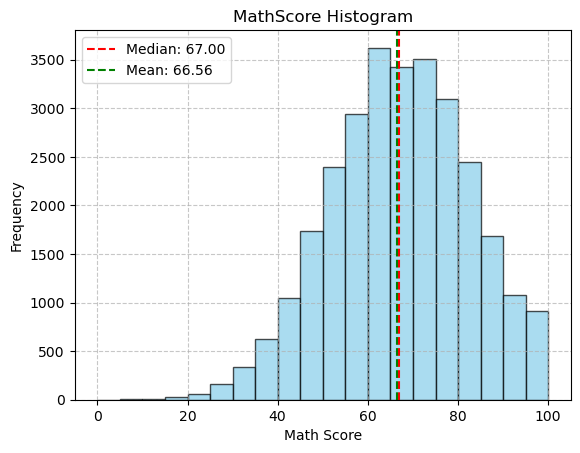

In [3]:
# Data for the histogram
math_scores = df["MathScore"]

# Creating the histogram (bins as defined, colours and alpha arbitrarily)
plt.hist(math_scores, bins=20, edgecolor = "black", alpha=0.7, color = "skyblue")

# Calculating median and mean
median = math_scores.median()
mean = math_scores.mean()

# Adding vertical dashed lines for median and mean
plt.axvline(median, color= "red", linestyle="--", label=f"Median: {median:.2f}")
plt.axvline(mean, color= "green", linestyle="--", label=f"Mean: {mean:.2f}")

# Adding proper x and y axis labels
plt.xlabel("Math Score")
plt.ylabel("Frequency")

# Setting the title
plt.title("MathScore Histogram")

# Adding a grid
plt.grid(True, linestyle= "--", alpha=0.7)

# Adding a legend in the top left corner
plt.legend(loc="upper left")

plt.show()

3. a) Make a pie chart of the feature NrSiblings.

b) Display the labels for each wedge.

c) Display the percentages within edge wedge.

d) Title the figure "NrSiblings pie chart".

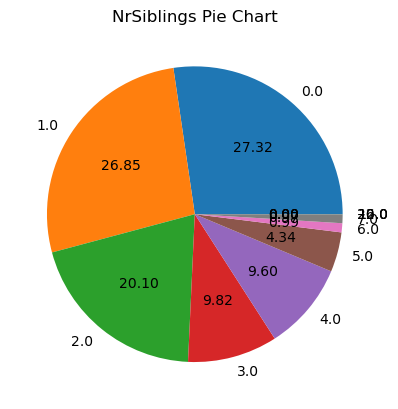

In [4]:
# Data for the pie chart
num_siblings = df["NrSiblings"].value_counts()

# Calculating the percentage distribution of each unique value
percent = (num_siblings/len(df))*100

# Naming slices
slice_name = df.groupby("NrSiblings").count().index.values

# Initializing a matplotlib figure
fig, ax = plt.subplots()
ax.set(aspect = "equal") # this ensures that the chart is a perfect circle 
ax.set_title("NrSiblings Pie Chart")

plt.pie(percent, labels = slice_name, autopct="%.2f") # displaying the percentages on each wedge, rounded to two decimal places
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group.

b) Color each bar in a different color. Set the transparency of the bars to 0.7

c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

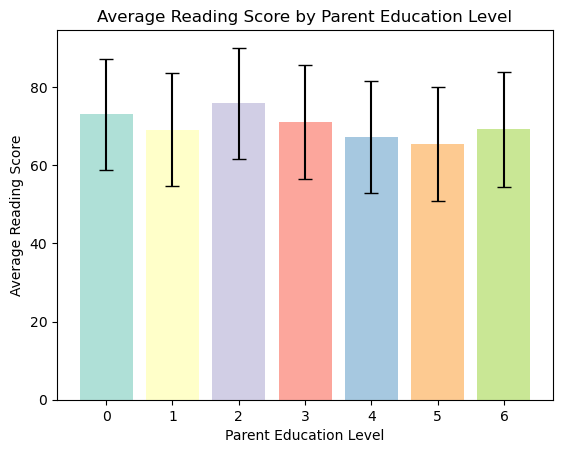

In [5]:
# Data for the bar chart --> .mean to get the average value of ReadingScore for each ParentEduc group
average_scores = df.groupby("ParentEduc")["ReadingScore"].mean()

# Calculating the standard deviation of ReadingScore for each ParentEduc group
std_dev_scores = df.groupby('ParentEduc')['ReadingScore'].std()

# Creating a bar chart
fig, ax = plt.subplots()
colors = plt.cm.Set3.colors  # some colors I found on the internet

# Setting the transparency of the bars to 0.7
bars = ax.bar(average_scores.index, average_scores, color = colors, alpha=0.7)

# Adding vertical error bars representing standard deviation
for bar, std_dev in zip(bars, std_dev_scores): # iterating through bars and their stdev scores
    ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr = std_dev, fmt = "none", ecolor = "black", capsize=5)
# .errorbar adds error bars, "bar.get_x() + bar.get_width() / 2" calculates the center of each bar, "bar.get_height()" retrieves the height of the bar, "yerr=std_dev" specifies the vertical error (standard deviation) for each bar, 
# fmt = "none" specifies that no line should be drawn connecting the error bar cap, "ecolor = "black"" sets the color of the bars, "capsize = 5" sets the size of the caps at the end of each error bar
    
# Setting labels and title
ax.set_xlabel("Parent Education Level")
ax.set_ylabel("Average Reading Score")
ax.set_title("Average Reading Score by Parent Education Level")

plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30.

b) In the top left axis: 1) Draw a line graph of the students' MathScores in descending order. 2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3. 

c) In the top right axis: 1) Draw a scatter plot of MathScore vs ReadingScore. 2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1. 3) Set the size of the bubbles to be 50*NrSiblings. 

d) In the bottom left axis: 1) Draw a boxplot of the WrittingScore feature values. 2) Remove fliers from the boxplot. 

e) In the borrom right axis: 1) Draw a bar plot of the number of students using each transportation method. 2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

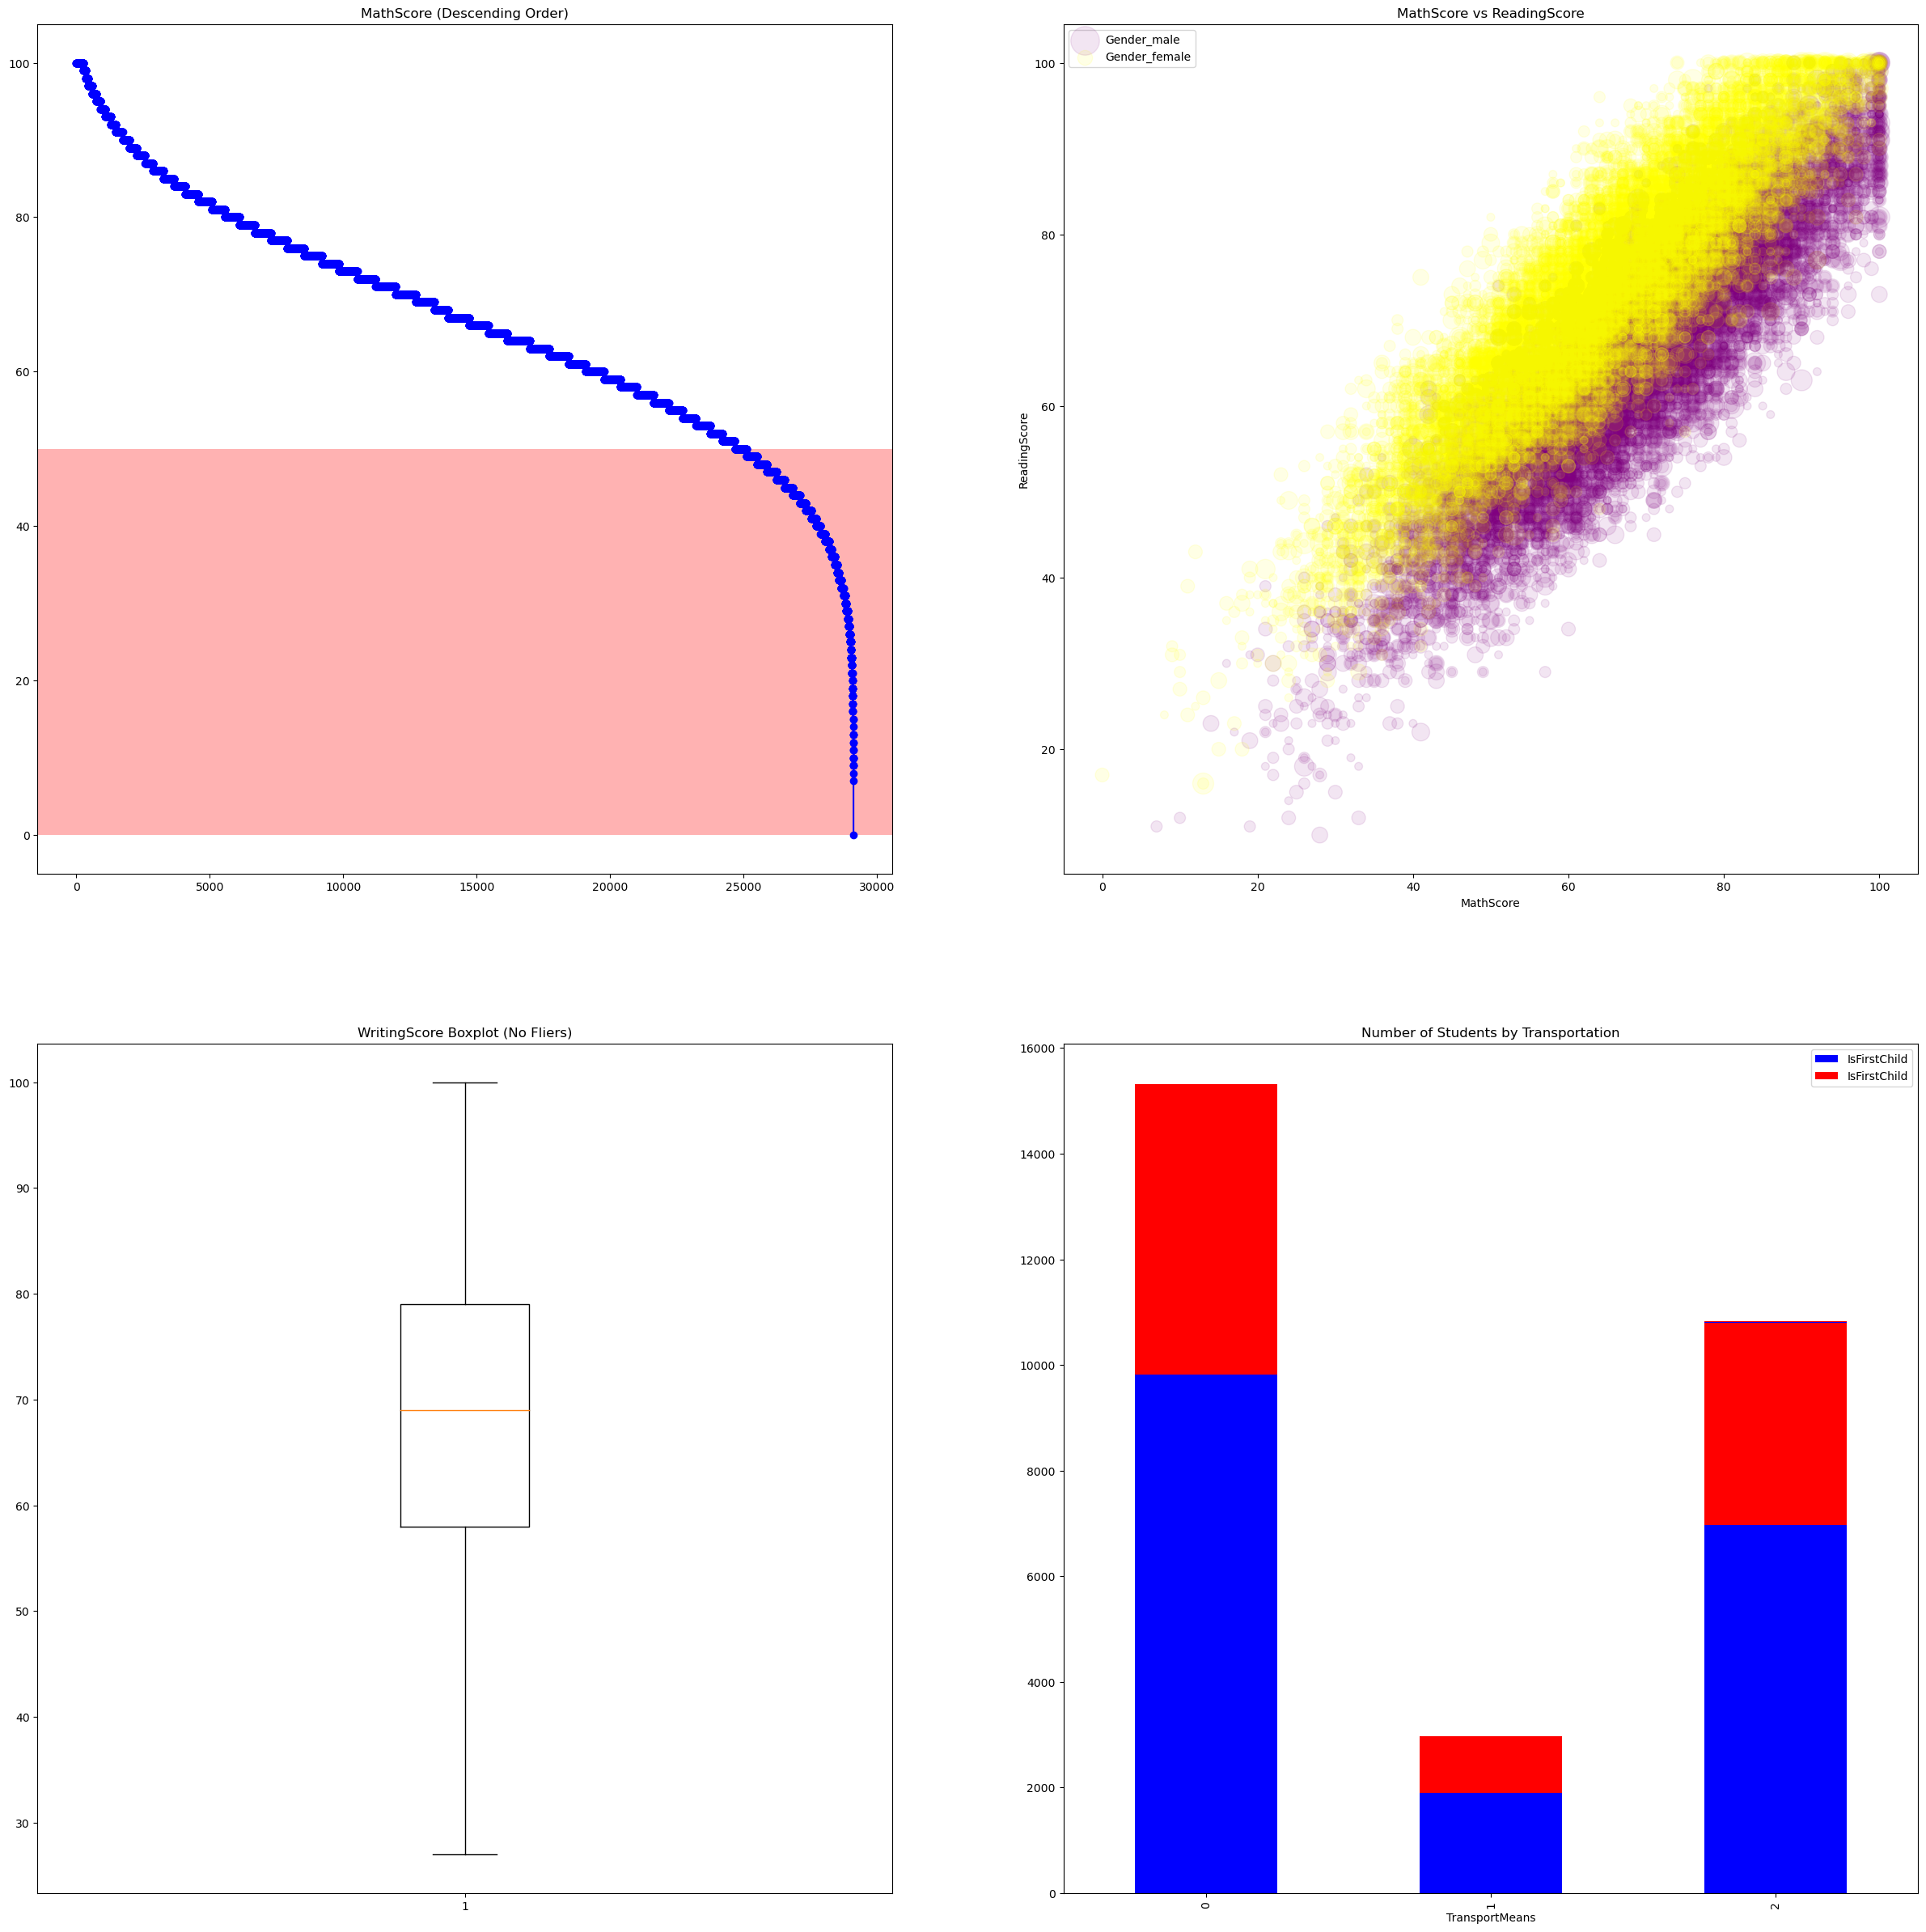

In [6]:
# Sorting DataFrame by MathScore in descending order
df.sort_values(by="MathScore", ascending=False, inplace=True)

# Creating a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(30, 30))

# Top left axis
axs[0, 0].plot(df.sort_values(by = ["MathScore"], ascending = False).reset_index(drop = True).MathScore, marker = "o", linestyle="-", color="b")
axs[0, 0].axhspan(0, 50, facecolor="red", alpha=0.3)
axs[0, 0].set_title("MathScore (Descending Order)")

# Top right axis
df_male = df[df["Gender_male"] == True]
df_female = df[df["Gender_female"] == True]

axs[0, 1].scatter(df_male["MathScore"], df_male["ReadingScore"], c="purple", alpha=0.1, s=df_male["NrSiblings"] * 50, label="Gender_male")
axs[0, 1].scatter(df_female["MathScore"], df_female["ReadingScore"], c="yellow", alpha=0.1, s=df_female["NrSiblings"] * 50, label="Gender_female")
axs[0, 1].set_xlabel("MathScore")
axs[0, 1].set_ylabel("ReadingScore")
axs[0, 1].set_title("MathScore vs ReadingScore")
axs[0, 1].legend()

# Bottom left axis
axs[1, 0].boxplot(df["WritingScore"], showfliers=False)
axs[1, 0].set_title("WritingScore Boxplot (No Fliers)")

# Bottom right axis
transportation_counts = df["TransportMeans"].value_counts()
first_child_counts = df.groupby("TransportMeans")["IsFirstChild"].value_counts().unstack().fillna(0)
first_child_counts.plot(kind="bar", stacked=True, color=["blue", "red"], ax=axs[1, 1])
axs[1, 1].set_title("Number of Students by Transportation")
axs[1, 1].legend(["IsFirstChild", "IsFirstChild"])

# Display the plot
plt.show()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features.

b) Set the figure size to 20 by 10.

b) Make the heatmap display 2 decimal places of the values of the correlation coefficients.

c) Use the "icefire" colormap.

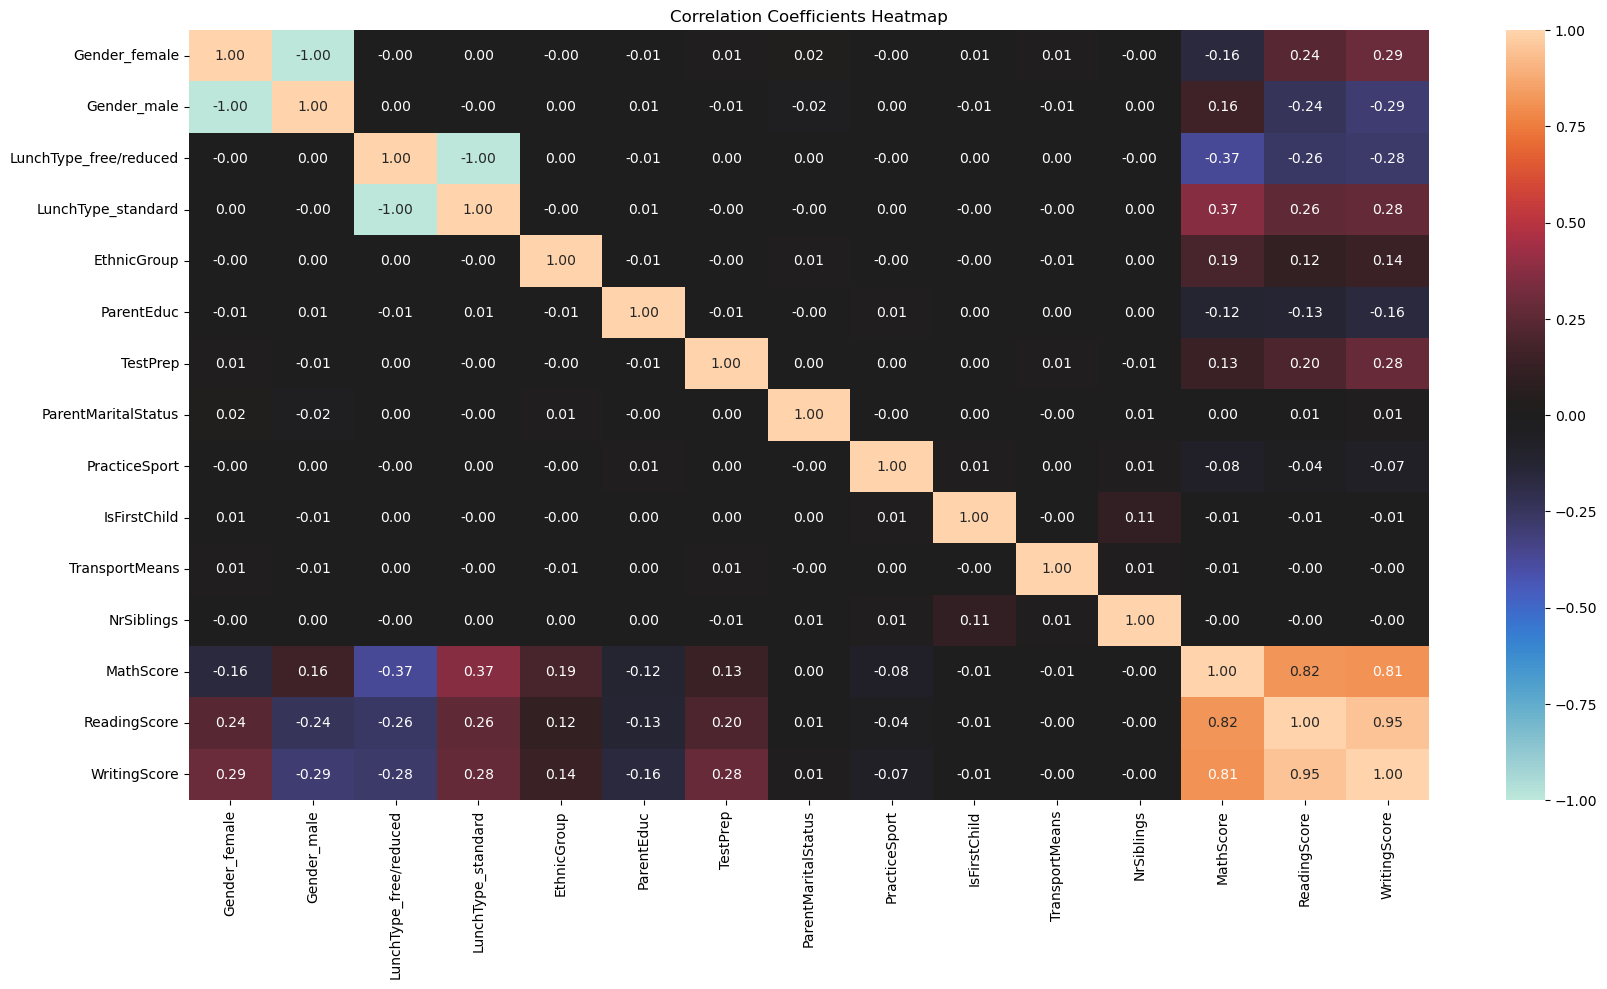

In [7]:
# Calculating correlation matrix using ".corr()" method of correlation
correlation_matrix = df.corr()

# Setting figure size
plt.figure(figsize=(20, 10))

# Creating a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "icefire") # "fmt = "2.f"" displays 2 decimal places of the values

# Setting the title
plt.title("Correlation Coefficients Heatmap")

plt.show()

7. a) Make a scatterplot matrix of all the features.

b) Remove mirroring scatter plots.

c) Hue the plot by gender.

C:\Users\grga3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


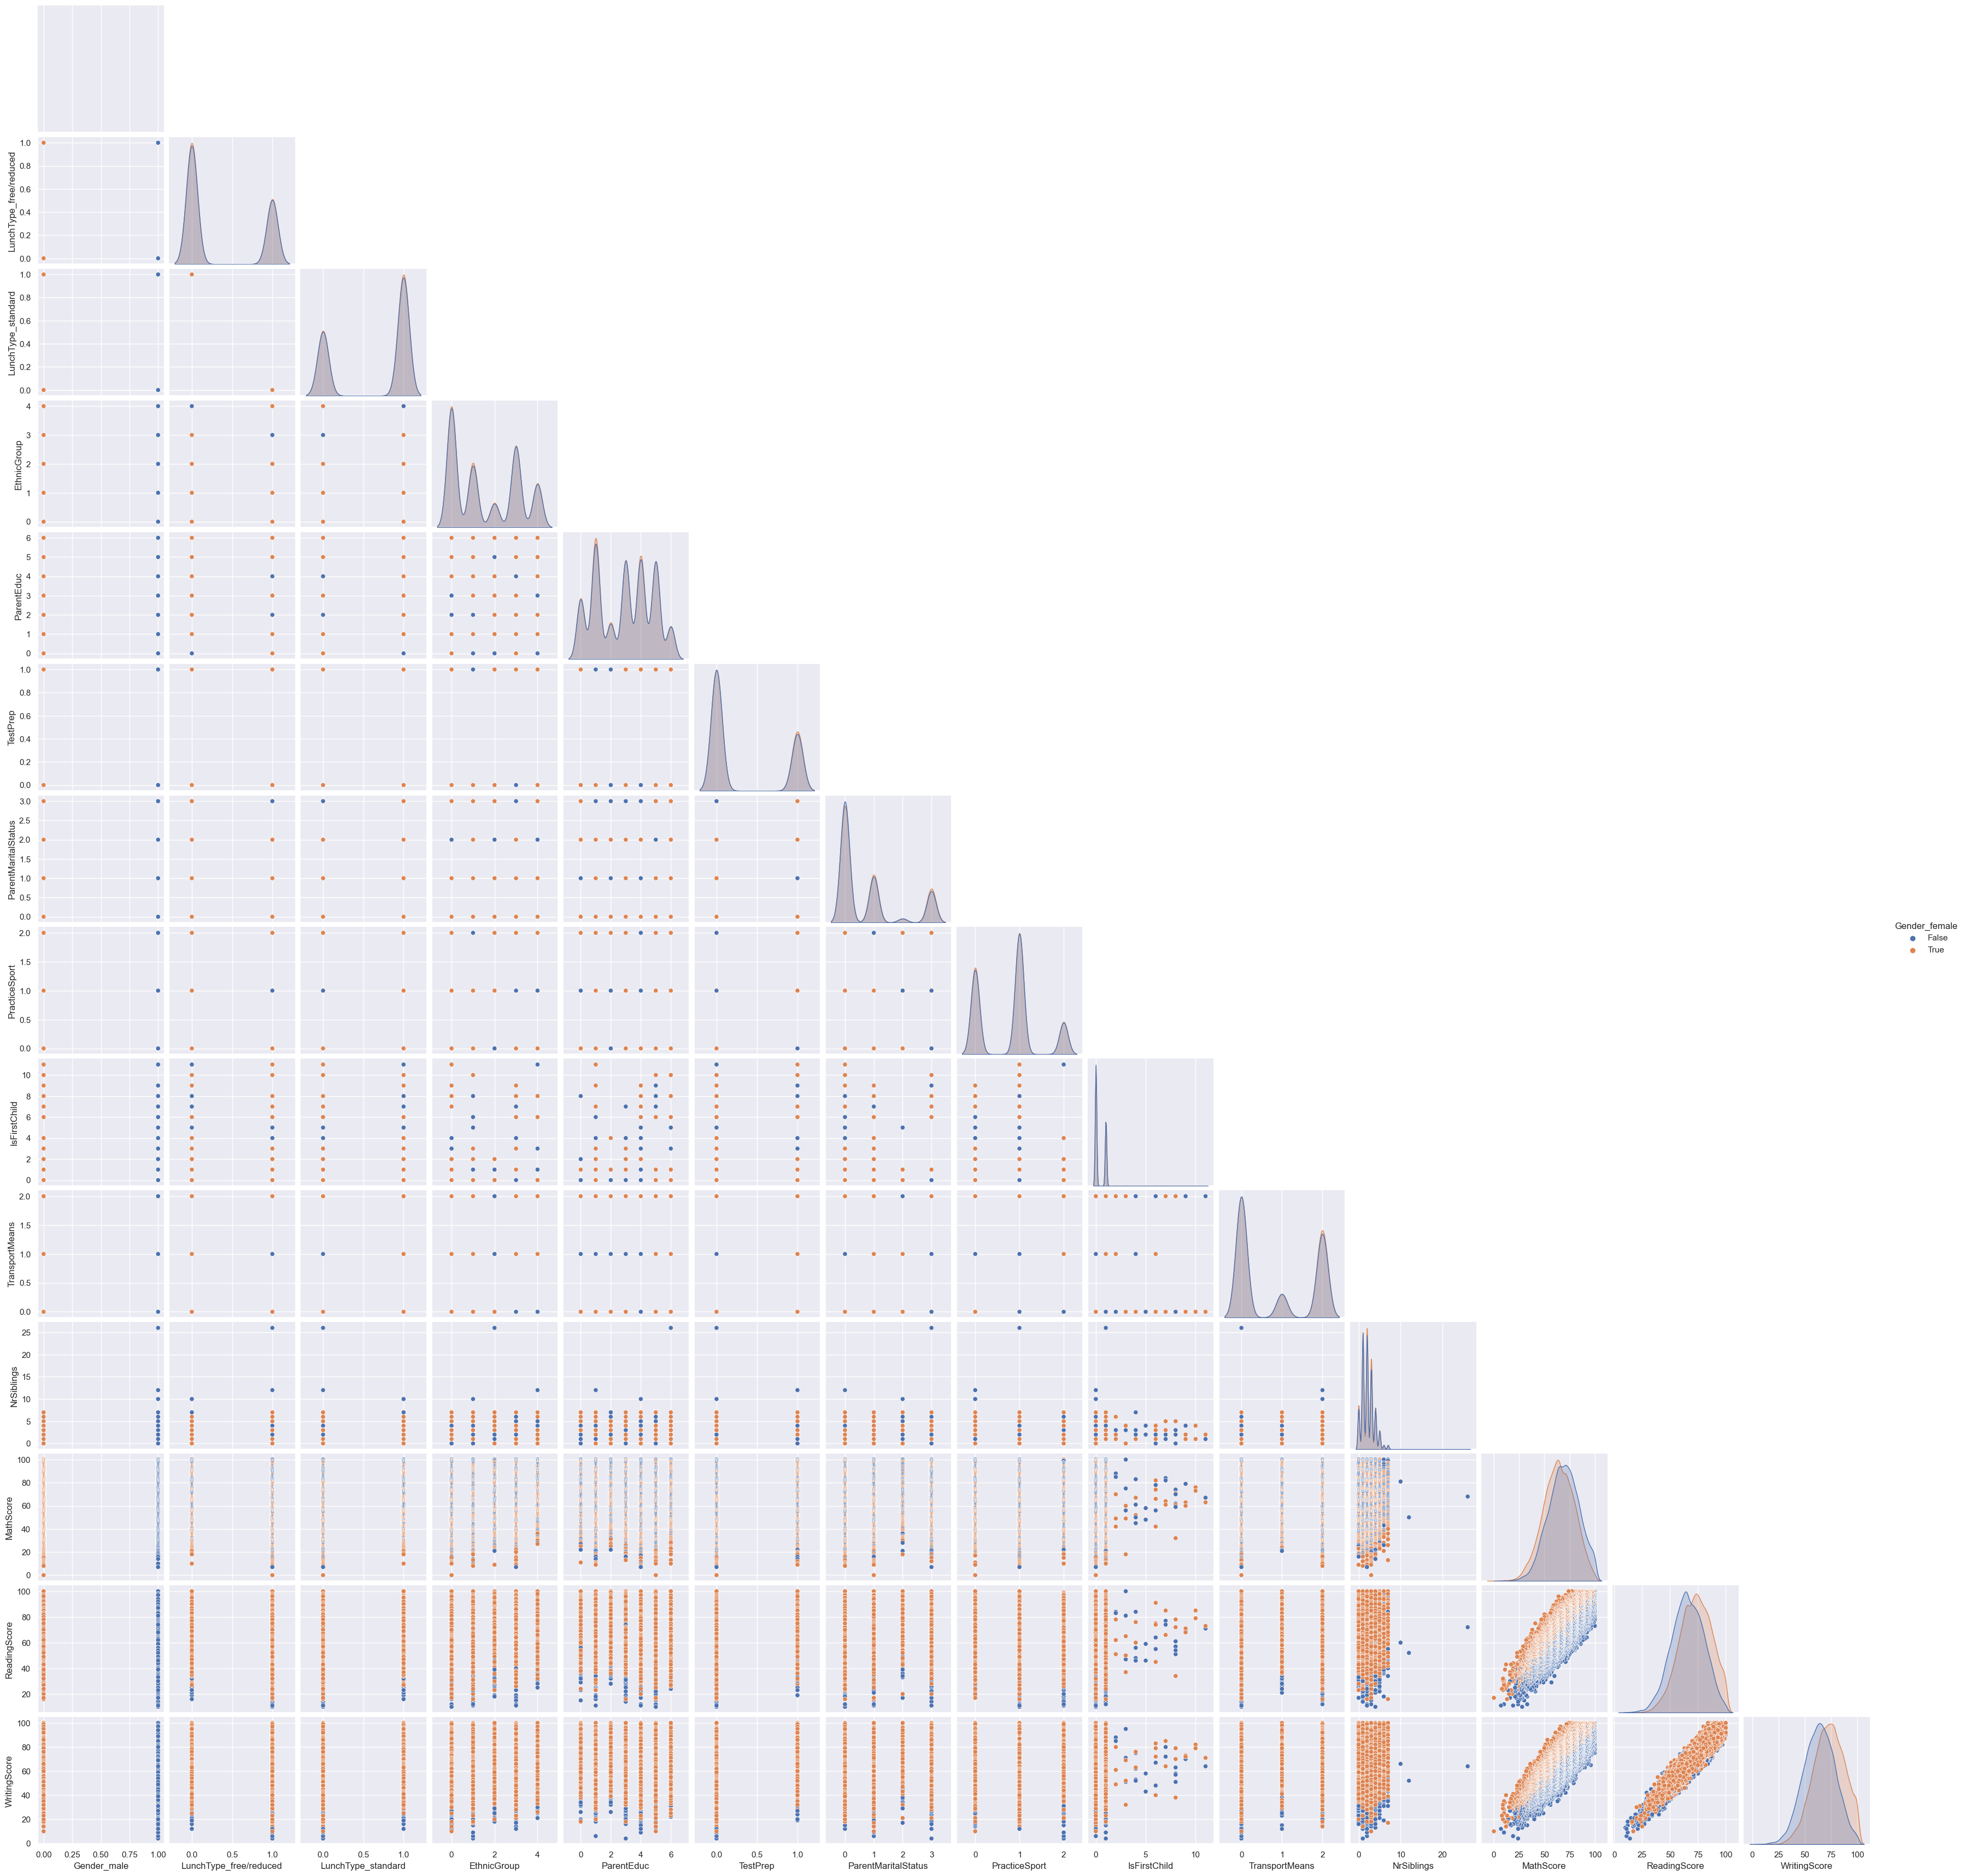

In [8]:
# first scatterplot for "Gender_female"
sns.set (rc={"figure.figsize":(25,15)})
sns.pairplot(df.loc[:,["Gender_female", "Gender_male", "LunchType_free/reduced", "LunchType_standard", "EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans", "NrSiblings", "MathScore", "ReadingScore", "WritingScore"]], hue="Gender_female", corner=True)
plt.show()

C:\Users\grga3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


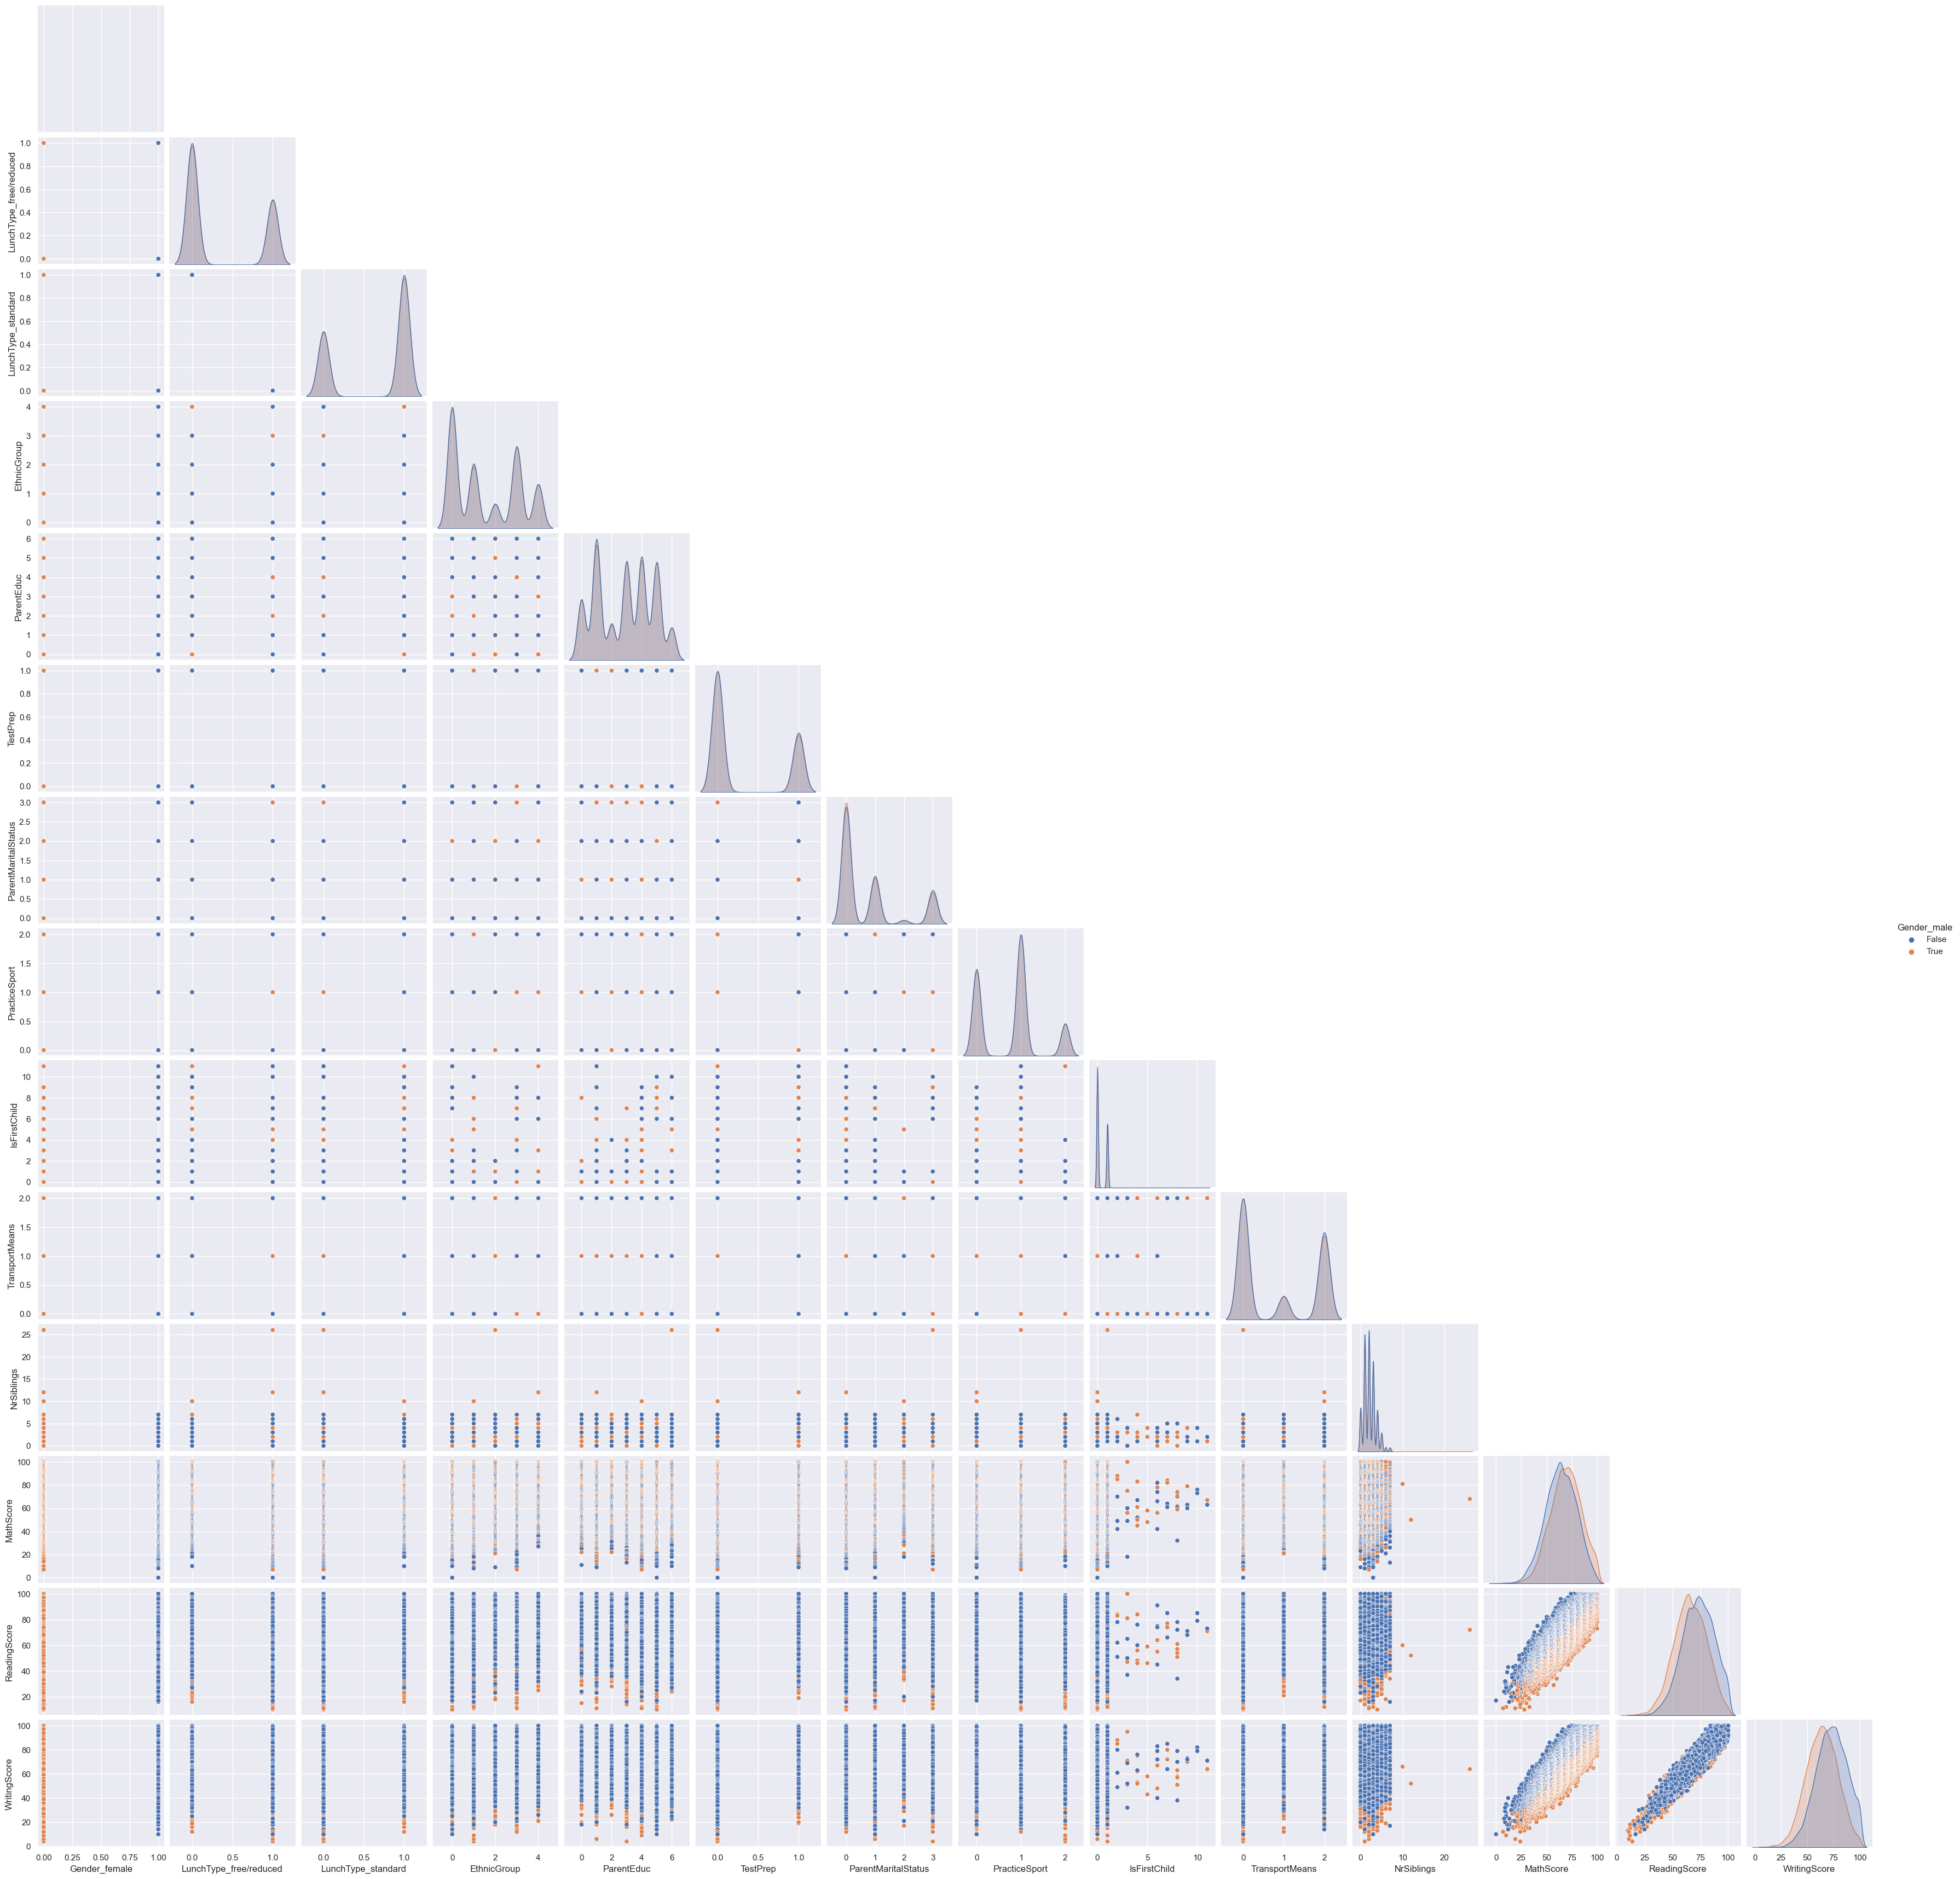

In [9]:
# second scatterplot for "Gender_male"
sns.set (rc={"figure.figsize":(25,15)})
sns.pairplot(df.loc[:,["Gender_female", "Gender_male", "LunchType_free/reduced", "LunchType_standard", "EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans", "NrSiblings", "MathScore", "ReadingScore", "WritingScore"]], hue="Gender_male", corner=True)
plt.show()

Data Science - 3rd homework assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
df = pd.read_csv ("transformed_dataset.csv")
df

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0               True        False                   False                True   
1               True        False                   False                True   
2               True        False                   False                True   
3              False         True                    True               False   
4              False         True                   False                True   
...              ...          ...                     ...                 ...   
29112           True        False                   False                True   
29113          False         True                   False                True   
29114           True        False                    True               False   
29115           True        False                   False                True   
29116          False         True                   False                True   

       EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0                0           0         0                    0              0   
1                0           1         0                    0              1   
2                1           2         0                    1              1   
3                2           3         0                    0              2   
4                0           1         0                    0              1   
...            ...         ...       ...                  ...            ...   
29112            3           4         0                    1              1   
29113            4           4         0                    1              0   
29114            0           4         1                    0              1   
29115            3           3         1                    0              0   
29116            1           1         0                    0              2   

       IsFirstChild  TransportMeans  NrSiblings  MathScore  ReadingScore  \
0                 0               0         3.0         71            71   
1                 0               1         0.0         69            90   
2                 0               0         4.0         87            93   
3                 1               1         1.0         45            56   
4                 0               0         0.0         76            78   
...             ...             ...         ...        ...           ...   
29112             1               0         2.0         59            61   
29113             1               2         1.0         58            53   
29114             1               2         1.0         61            70   
29115             1               0         3.0         82            90   
29116             1               0         1.0         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 15 columns]

2. a) Find the mean, median and average scores in mathematics, reading and writing.

b) Find the mean, median and average scores for males and females.

c) What is the coefficient of variation of the scores?

In [3]:
Math_mean = df["MathScore"].mean()
print(f"Mean score in Mathematics is: {(Math_mean):.2f}")

Math_median = df ["MathScore"].median()
print(f"Median score in Mathematics is: {(Math_median):.2f}")

Math_mode = df["MathScore"].mode().iloc[0] # .iloc[0] extracts only the first mode (if there are multiple)
print(f"Mode score in Mathematics is: {(Math_mode):.2f}")
# Mode taken for "average score" as specified in the task

Mean score in Mathematics is: 66.56
Median score in Mathematics is: 67.00
Mode score in Mathematics is: 64.00


In [4]:
Reading_mean = df["ReadingScore"].mean()
print(f"Mean score in Reading is: {(Reading_mean):.2f}")

Reading_median = df["ReadingScore"].median()
print(f"Median score in Reading is: {(Reading_median):.2f}")

Reading_mode = df["ReadingScore"].mode().iloc[0]
print(f"Mode score in Reading is: {(Reading_mode):.2f}")
# Mode taken for "average score" as specified in the task

Mean score in Reading is: 69.39
Median score in Reading is: 70.00
Mode score in Reading is: 65.00


In [5]:
Writing_mean = df["WritingScore"].mean()
print(f"Mean score in Writing is: {(Writing_mean):.2f}")

Writing_median = df["WritingScore"].median()
print(f"Median score in Writing is: {(Writing_median):.2f}")

Writing_mode = df["WritingScore"].mode().iloc[0]
print(f"Mode score in Writing is: {(Writing_mode):.2f}")
# Mode taken for "average score" as specified in the task

Mean score in Writing is: 68.43
Median score in Writing is: 69.00
Mode score in Writing is: 67.00


In [6]:
# Finding the mean scores by gender
selected_columns = ["Gender_female", "Gender_male", "MathScore", "ReadingScore", "WritingScore"]
df_selected = df[selected_columns]

mean_scores_by_gender = df_selected.groupby(["Gender_female", "Gender_male"]).mean()

print(f"Mean scores by Gender:\n {mean_scores_by_gender}")

Mean scores by Gender:
                            MathScore  ReadingScore  WritingScore
Gender_female Gender_male                                       
False         True         69.038488     65.824657     63.889866
True          False        64.119419     72.900825     72.899189


In [7]:
# Finding the median scores by gender
median_scores_by_gender = df_selected.groupby(["Gender_male", "Gender_female"]).median()

print(f"Median scores by Gender:\n{median_scores_by_gender}")

Median scores by Gender:
                           MathScore  ReadingScore  WritingScore
Gender_male Gender_female                                       
False       True                64.0          73.0          73.0
True        False               69.0          66.0          64.0


In [8]:
# Finding the mode scores by gender ("average score" considered to be mode)
mode_scores_by_gender = df_selected.groupby(["Gender_male", "Gender_female"]).apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# ".apply" is used because pd.Series.mode() returns a series, not a scalar --> the scipy.stats.mode returns a tuple of (mode, count) and we just need the mode
print(f"Mode scores by Gender:\n{mode_scores_by_gender}")

Mode scores by Gender:
0                          Gender_female  Gender_male  MathScore  \
Gender_male Gender_female                                          
False       True                    True        False         64   
True        False                  False         True         64   

0                          ReadingScore  WritingScore  
Gender_male Gender_female                              
False       True                     65            78  
True        False                    65            63  


In [9]:
# coefficient of variation is calculated by dividing the standard deviation with the mean and multiplying it by 100

coef_var_math = df["MathScore"].std() / df.MathScore.mean() * 100
print(f"The coefficient of variation of Math scores is: {(coef_var_math):.3f}")

coef_var_reading = df["ReadingScore"].std() / df.ReadingScore.mean() * 100
print(f"The coefficient of variation of Reading scores is: {(coef_var_reading):.3f}")

coef_var_writing = df["WritingScore"].std() / df.WritingScore.mean() * 100
print(f"The coefficient of variation of Writing scores is: {(coef_var_writing):.3f}")

The coefficient of variation of Math scores is: 23.053
The coefficient of variation of Reading scores is: 21.271
The coefficient of variation of Writing scores is: 22.575


3. a) Use a statistical test to test the hypothesis:
H0: the mean mathematical scores of females and males are equal.

In [10]:
math_scores_male = df.loc[df["Gender_male"], "MathScore"]
math_scores_female = df.loc[df["Gender_female"], "MathScore"]

t_statistic, p_value = ttest_ind(math_scores_male, math_scores_female) # using "ttest_ind" to perform an independent two-sample t-test for means 

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). Verdict: The mean math scores are not equal.")
else:
    print("Failed to reject the null hypothesis (H0). Verdict: The mean math scores are equal.")

t-statistic: 27.70843426303627
p-value: 8.09604172877808e-167
Reject the null hypothesis (H0). Verdict: The mean math scores are not equal.


4. a) Use a statistical test to test the hypothesis:
H0 Gender did not affect the writing scores.
H1 Gender affected the writing score

In [11]:
from statsmodels.stats.weightstats import ztest as ztest

In [12]:
muškarci = df.query("Gender_male") # only "Gender_male" is True
žene = df.query("Gender_female") # only "Gender_female" is True

muškarci_sample = muškarci.sample(n=100, random_state=1) #random_state remembers which sample was chosen
žene_sample = žene.sample(n=100, random_state=1)

df.groupby("Gender_male")["WritingScore"].mean()

Gender_male
False    72.899189
True     63.889866
Name: WritingScore, dtype: float64

In [13]:
# using z-test to determine if there is a significant difference between sample and population means or between the means of two independent samples
writing_scores_male = df.loc[df["Gender_male"], "WritingScore"]
writing_scores_female = df.loc[df["Gender_female"], "WritingScore"]

z_statistic, p_value = ztest(writing_scores_male, writing_scores_female)

print("z-statistic:", z_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). Verdict: Gender affects the writing scores.")
else:
    print("Failed to reject the null hypothesis (H0). Verdict: Gender did not affect the writing scores.")

z-statistic: -52.01694529394566
p-value: 0.0
Reject the null hypothesis (H0). Verdict: Gender affects the writing scores.


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.

b) Plot the distributions for each of the separate scores in both genders.

In [14]:
from scipy.stats import shapiro

In [15]:
# Using the Shapiro-Wilk test to determine whether a data sample has a Gaussian distribution (normality of distribution)
math_scores_male = df.loc[df["Gender_male"], "MathScore"]
reading_scores_male = df.loc[df["Gender_male"], "ReadingScore"]
writing_scores_male = df.loc[df["Gender_male"], "WritingScore"]

math_scores_female = df.loc[df["Gender_female"], "MathScore"]
reading_scores_female = df.loc[df["Gender_female"], "ReadingScore"]
writing_scores_female = df.loc[df["Gender_female"], "WritingScore"]

# shapiro() function used to perform the Shapiro-Wilk test for males
stat_math_male, p_math_male = shapiro(math_scores_male)
stat_reading_male, p_reading_male = shapiro(reading_scores_male)
stat_writing_male, p_writing_male = shapiro(writing_scores_male)

# shapiro() function used to perform the Shapiro-Wilk test for females
stat_math_female, p_math_female = shapiro(math_scores_female)
stat_reading_female, p_reading_female = shapiro(reading_scores_female)
stat_writing_female, p_writing_female = shapiro(writing_scores_female)

# Printing the results
print("Shapiro-Wilk test results for male scores:")
print("Math Score:", "Statistic =", stat_math_male,"-->", "p-value =", p_math_male)
print("Reading Score:", "Statistic =", stat_reading_male,"-->",  "p-value =", p_reading_male)
print("Writing Score:", "Statistic =", stat_writing_male,"-->",  "p-value =", p_writing_male)

print("\nShapiro-Wilk test results for female scores:")
print("Math Score:", "Statistic =", stat_math_female,"-->", "p-value =", p_math_female)
print("Reading Score:", "Statistic =", stat_reading_female,"-->", "p-value =", p_reading_female)
print("Writing Score:", "Statistic =", stat_writing_female, "-->", "p-value =", p_writing_female)

# Significance level
alpha = 0.05

# Interpretation for Math Scores (Male)
if p_math_male > alpha:
    print("\nMath scores for males appear to be normally distributed (Fail to reject H0).")
else:
    print("\nMath scores for males don't follow a normal distribution (Reject H0).")

# Interpretation for Reading Scores (Male)
if p_reading_male > alpha:
    print("\nReading scores for males appear to be normally distributed (Fail to reject H0).")
else:
    print("\nReading scores for males don't follow a normal distribution (Reject H0).")

# Interpretation for Writing Scores (Male)
if p_writing_male > alpha:
    print("\nWriting scores for males appear to be normally distributed (Fail to reject H0).")
else:
    print("\nWriting scores for males don't follow a normal distribution (Reject H0).")

# Interpretation for Math Scores (Female)
if p_math_female > alpha:
    print("\nMath scores for females appear to be normally distributed (Fail to reject H0).")
else:
    print("\nMath scores for females don't follow a normal distribution (Reject H0).")

# Interpretation for Reading Scores (Female)
if p_reading_female > alpha:
    print("\nReading scores for females appear to be normally distributed (Fail to reject H0).")
else:
    print("\nReading scores for females don't follow a normal distribution (Reject H0).")

# Interpretation for Writing Scores (Female)
if p_writing_female > alpha:
    print("\nWriting scores for females appear to be normally distributed (Fail to reject H0).")
else:
    print("\nWriting scores for females don't follow a normal distribution (Reject H0).")

Shapiro-Wilk test results for male scores:
Math Score: Statistic = 0.9937645792961121 --> p-value = 1.963427264225559e-24
Reading Score: Statistic = 0.9965114593505859 --> p-value = 5.4572049773103924e-18
Writing Score: Statistic = 0.9975166916847229 --> p-value = 1.0420935388753567e-14

Shapiro-Wilk test results for female scores:
Math Score: Statistic = 0.9962141513824463 --> p-value = 5.547181238248118e-19
Reading Score: Statistic = 0.9898728132247925 --> p-value = 7.967642709591044e-31
Writing Score: Statistic = 0.9890199303627014 --> p-value = 6.203713754261252e-32

Math scores for males don't follow a normal distribution (Reject H0).

Reading scores for males don't follow a normal distribution (Reject H0).

Writing scores for males don't follow a normal distribution (Reject H0).

Math scores for females don't follow a normal distribution (Reject H0).

Reading scores for females don't follow a normal distribution (Reject H0).

Writing scores for females don't follow a normal distr

C:\Users\grga3\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


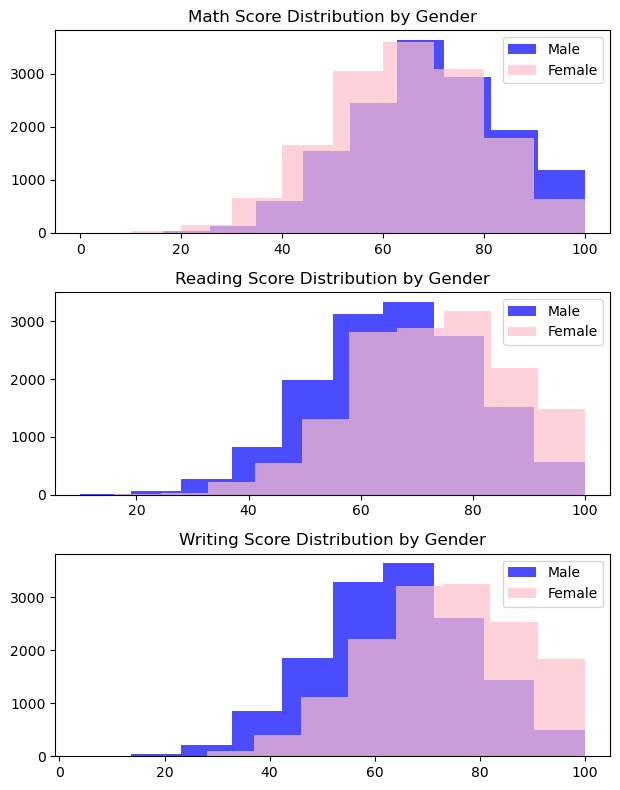

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1) # defining the subplots in a grid --> (total number of rows, total number of columns, the position of the subplot)
plt.hist(math_scores_male, color="blue", alpha=0.7, label="Male")
plt.hist(math_scores_female, color="pink", alpha=0.7, label="Female")
plt.title("Math Score Distribution by Gender")
plt.legend()

plt.subplot(3, 2, 3)
plt.hist(reading_scores_male, color="blue", alpha=0.7, label="Male")
plt.hist(reading_scores_female, color="pink", alpha=0.7, label="Female")
plt.title("Reading Score Distribution by Gender")
plt.legend()

plt.subplot(3, 2, 5)
plt.hist(writing_scores_male, color="blue", alpha=0.7, label="Male")
plt.hist(writing_scores_female, color="pink", alpha=0.7, label="Female")
plt.title("Writing Score Distribution by Gender")
plt.legend()

plt.tight_layout() # adjusts the space between subplots for clarity
plt.show()

Data Science - 4th homework assignment

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alph

In [1]:
import numpy as np
import pandas as pd

def cronbach_alpha(items):
    num_items = items.shape[1] # calculating the number of items by retrieving the number of columns in the df
    total_variance = np.var(items.sum(axis=1), ddof=num_items) # "np.var" calculates the total variance across all items for each variable, "items.sum" sums the scores of each variable, Delta Degrees of Freedom (ddof) is set to num_items
    observed_variance = np.sum(items.var(axis=0, ddof=1)) # observed variance is the sum of the variances of each item across all respondents, "ddof = 1" adjusts the ddof when calculating the variance
    
    cronbach_alpha = (num_items / (num_items - 1)) * (1 - observed_variance / total_variance) # standard Cronbach alpha equation using previously determined variables
    
    return cronbach_alpha

In [2]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

In [3]:
cronbach_alpha_value = cronbach_alpha(questionnaire)

print(f"Cronbach's Alpha: {cronbach_alpha_value:.4f}")

Cronbach's Alpha: 0.9349


2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing.

In-house data labeling ensures the highest quality when it comes to data labeling, because the data is usually marked by scientists or people in the organization, who are most familiar with the wanted outcome.

Crowdsourcing is most useful when we are dealing with datasets which mostly consist of trivial data, e.g. images of
animals, plants and natural environments, and do not require additional expertise. This is done with the help of a large number of freelancers registered on the crowdsourcing platform.

Outsourcing presents a middle ground between crowdsourcing and in-house labeling. In this method the task of annotating data is left to an individual or organization that has trained annotators. It is ideal for projects that do not have a lot of funding, but require significant quality data marking. Unlike crowdsourcing, where anyone can influence your data, outsourcing allows for
evaluation of individuals or organizations prior to letting them handle the work.

3. Explain the main differences between annotation for image classification, object detection and image segmentation.

In image classification, the goal is to assign a single label or class to an entire image so that the model learns to recognize and categorize the overall content of the image. It's also possible to classify using multiple tags.

Object detection involves identifying and locating multiple objects within an image. The model needs to provide bounding boxes around each object and classify them into specific categories. The coordinates of the boudning boxes and the corresponding label are remembered and stored in a JSON file in dictionary format where the key of the dictionary is the number or ID of the image.

Image segmentation involves dividing an image into distinct segments or regions based on the content. Each segment corresponds to a particular object or region of interest. This usually results in images of the same size as the original image. If several objects are segmented within one image, each object is marked on a separate channel. The sum of all channels is the reference image.

Data Science - 5th homework assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# setting a seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
df = pd.read_csv("transformed_dataset.csv")
df

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0               True        False                   False                True   
1               True        False                   False                True   
2               True        False                   False                True   
3              False         True                    True               False   
4              False         True                   False                True   
...              ...          ...                     ...                 ...   
29112           True        False                   False                True   
29113          False         True                   False                True   
29114           True        False                    True               False   
29115           True        False                   False                True   
29116          False         True                   False                True   

       EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0                0           0         0                    0              0   
1                0           1         0                    0              1   
2                1           2         0                    1              1   
3                2           3         0                    0              2   
4                0           1         0                    0              1   
...            ...         ...       ...                  ...            ...   
29112            3           4         0                    1              1   
29113            4           4         0                    1              0   
29114            0           4         1                    0              1   
29115            3           3         1                    0              0   
29116            1           1         0                    0              2   

       IsFirstChild  TransportMeans  NrSiblings  MathScore  ReadingScore  \
0                 0               0         3.0         71            71   
1                 0               1         0.0         69            90   
2                 0               0         4.0         87            93   
3                 1               1         1.0         45            56   
4                 0               0         0.0         76            78   
...             ...             ...         ...        ...           ...   
29112             1               0         2.0         59            61   
29113             1               2         1.0         58            53   
29114             1               2         1.0         61            70   
29115             1               0         3.0         82            90   
29116             1               0         1.0         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 15 columns]

2. Using linear regression, model the MathScore using features: TestPrep, NrSiblings, ParentMaritalStatus and ReadingScore. 

<Axes: xlabel='ReadingScore', ylabel='MathScore'>

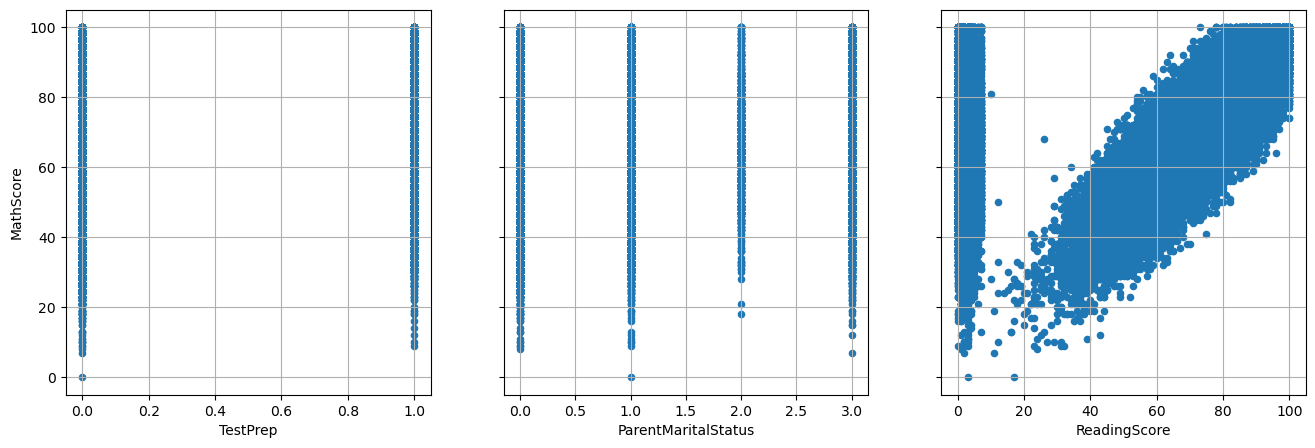

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind="scatter", x="TestPrep", y="MathScore", ax = axs[0], figsize=(16, 5), grid=True) # "axs[0]" --> histogram should be drawn on the first row
df.plot(kind="scatter", x="ParentMaritalStatus", y="MathScore", ax = axs[1], grid=True)
df.plot(kind="scatter", x="NrSiblings", y="MathScore", ax = axs[2], grid=True)
df.plot(kind="scatter", x="ReadingScore", y="MathScore", ax = axs[2], grid=True)

In [4]:
# Declaring the model

mod = smf.ols(formula = "MathScore ~ C(TestPrep) + NrSiblings + C(ParentMaritalStatus) + ReadingScore", data = df)
res = mod.fit() # training a linear regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9829.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:18:23   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29110   BIC:                         2.095e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.5095      0.264     28.407      0.000       6.991       8.028
C(TestPrep)[T.1]               -1.1060      0.113     -9.807      0.000      -1.327      -0.885
C(ParentMaritalStatus)[T.1]    -0.3052      0.127     -2.408      0.016      -0.554      -0.057
C(ParentMaritalStatus)[T.2]     0.3698      0.380      0.973      0.331      -0.375       1.115
C(ParentMaritalStatus)[T.3]    -0.1733      0.145     -1.193      0.233      -0.458       0.112
NrSiblings                      0.0155      0.036      0.428      0.668      -0.055       0.086
ReadingScore                    0.8570      0.004    239.510      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.486   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.618
Skew:                          -0.010   Prob(JB):                     1.61e-34
Kurtosis:                       2.642   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X = df[["TestPrep", "NrSiblings", "ParentMaritalStatus", "ReadingScore"]]

# Dependent variable (class vector)
y = df["MathScore"]

# Display the feature matrix and class vector
print("Feature Matrix (X):")
print(X)

print("\nClass Vector (y):")
y

Feature Matrix (X):
       TestPrep  NrSiblings  ParentMaritalStatus  ReadingScore
0             0         3.0                    0            71
1             0         0.0                    0            90
2             0         4.0                    1            93
3             0         1.0                    0            56
4             0         0.0                    0            78
...         ...         ...                  ...           ...
29112         0         2.0                    1            61
29113         0         1.0                    1            53
29114         1         1.0                    0            70
29115         1         3.0                    0            90
29116         0         1.0                    0            60

[29117 rows x 4 columns]

Class Vector (y):


0        71
1        69
2        87
3        45
4        76
         ..
29112    59
29113    58
29114    61
29115    82
29116    64
Name: MathScore, Length: 29117, dtype: int64

In [6]:
X.isna().sum(axis=0)

TestPrep               0
NrSiblings             0
ParentMaritalStatus    0
ReadingScore           0
dtype: int64

In [7]:
missing_data = df.isnull().sum()

# Displaying the count of missing values for each column
print("Missing Data:")
print(missing_data)

Missing Data:
Gender_female             0
Gender_male               0
LunchType_free/reduced    0
LunchType_standard        0
EthnicGroup               0
ParentEduc                0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans            0
NrSiblings                0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [8]:
model = LinearRegression()  # create the model
model.fit(X, y)  # train it

LinearRegression()

In [9]:
# summary of coefficients --> redundant
feature_cols = ["TestPrep", "NrSiblings", "ParentMaritalStatus",  "ReadingScore"]
print(f"{model.intercept_:.3}", end="")
for coef, feature in zip(model.coef_, feature_cols):
    print(f" + {coef:.3} * {feature}", end="")

7.46 + -1.11 * TestPrep + 0.0159 * NrSiblings + -0.06 * ParentMaritalStatus + 0.857 * ReadingScore

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore =$ $7.51 + (-1.11) * TestPrep[T.1] + 0.016 * NrSiblings + (-0.31) * ParentMaritalStatus[T.1] + 0.37 * ParentMaritalStatus[T.2] + -0.17 * ParentMaritalStatus[T.3] + 0.86 * ReadingScore$

b) Are there any statisticaly important features?

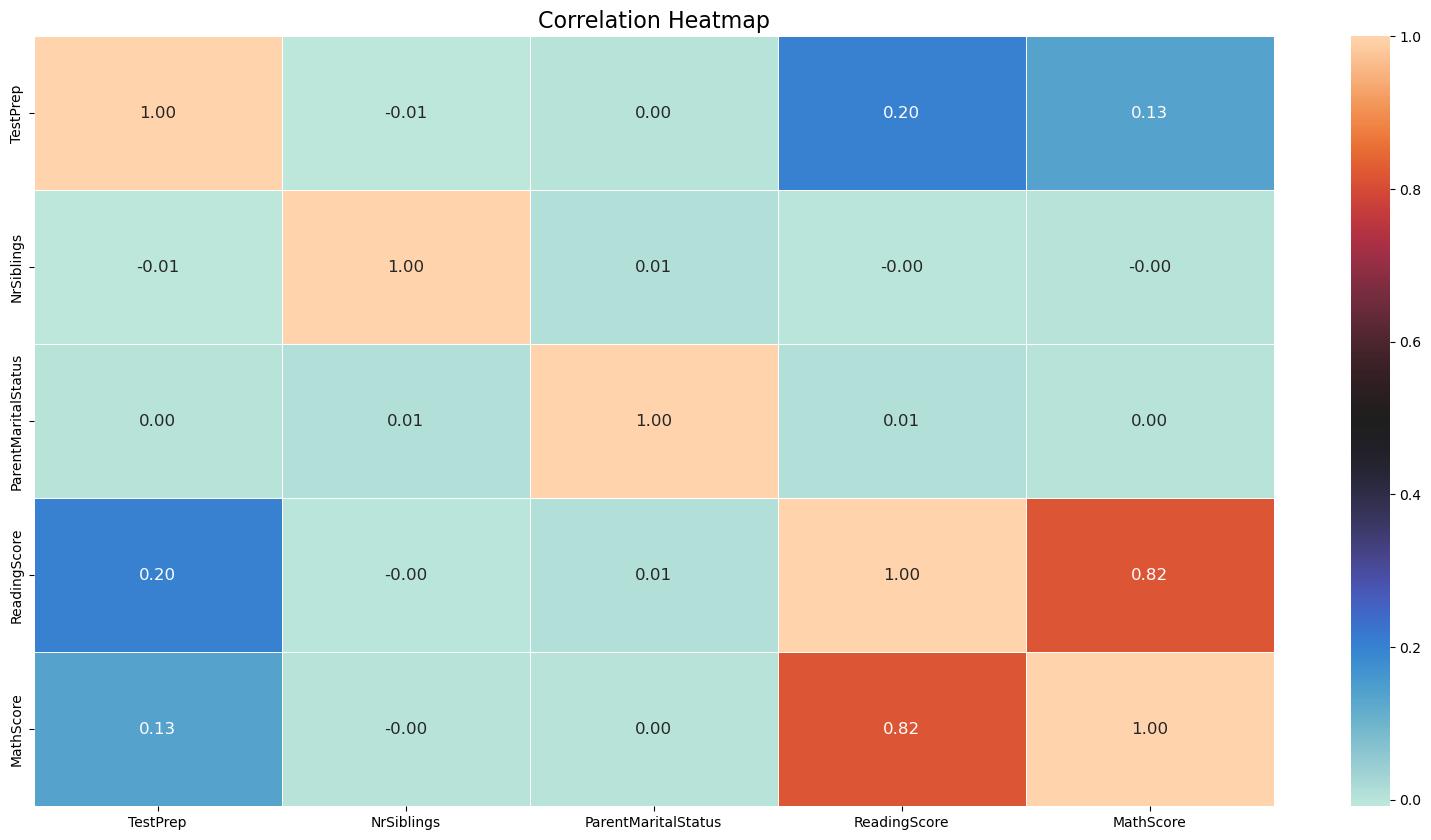

In [10]:
columns_of_interest = ["TestPrep", "NrSiblings", "ParentMaritalStatus", "ReadingScore", "MathScore"]
subset_df = df[columns_of_interest]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correlation_matrix, annot=True, cmap="icefire", fmt=".2f", linewidths=.5, annot_kws={"size": 12})

plt.title("Correlation Heatmap", fontsize=16)

plt.show()

ReadingScore seems to display a very strong level of correlation with MathScore (0.82), indicating a positive linear relationship. TestPrep also seems to have a positive linear relationship with MathScore, although the strength is not as significant as with ReadingScore (0.13). Other independent variables seem to have none or next to no impact on the dependent variable. Therefore, ReadingScore and TestPrep are statisticaly important.

c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam? 

According to the models, test preparation seems to negatively impact the outcome on the math exam. Specifically, with a singular unit change in TestPrep, the MathScore decreases by 1.11, given that every other independent variable remains unchanged (ceteris paribus). Coupled with a strong correlation, this means that students who prepared for the test, most of the time, got a worse score than those who haven't.

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [11]:
mod = smf.ols(formula = "MathScore ~ C(PracticeSport) - 1", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     87.35
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.51e-38
Time:                        10:18:23   Log-Likelihood:            -1.2074e+05
No. Observations:               29117   AIC:                         2.415e+05
Df Residuals:                   29114   BIC:                         2.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(PracticeSport)[0]    67.8441    

According to the model, students who practice sports perform better at math exams. Those who never practice sports (C(PracticeSport)[2]) have the lowest average score on math exams out of the three observed categories. Those who sometimes practice sports (C(PracticeSport)[1]) see an increase in their mathematical abilities and those who regularly practice sports (C(PracticeSport)[0]) still see a further, although slight increase.

Data Science - 6th homework assignment

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution
df = pd.read_csv("transformed_dataset.csv")
df

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0               True        False                   False                True   
1               True        False                   False                True   
2               True        False                   False                True   
3              False         True                    True               False   
4              False         True                   False                True   
...              ...          ...                     ...                 ...   
29112           True        False                   False                True   
29113          False         True                   False                True   
29114           True        False                    True               False   
29115           True        False                   False                True   
29116          False         True                   False                True   

       EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0                0           0         0                    0              0   
1                0           1         0                    0              1   
2                1           2         0                    1              1   
3                2           3         0                    0              2   
4                0           1         0                    0              1   
...            ...         ...       ...                  ...            ...   
29112            3           4         0                    1              1   
29113            4           4         0                    1              0   
29114            0           4         1                    0              1   
29115            3           3         1                    0              0   
29116            1           1         0                    0              2   

       IsFirstChild  TransportMeans  NrSiblings  MathScore  ReadingScore  \
0                 0               0         3.0         71            71   
1                 0               1         0.0         69            90   
2                 0               0         4.0         87            93   
3                 1               1         1.0         45            56   
4                 0               0         0.0         76            78   
...             ...             ...         ...        ...           ...   
29112             1               0         2.0         59            61   
29113             1               2         1.0         58            53   
29114             1               2         1.0         61            70   
29115             1               0         3.0         82            90   
29116             1               0         1.0         64            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 15 columns]

2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [3]:
#solution

df["MathScore"] = pd.cut(df["MathScore"], bins=[0, 49, 62, 74, 87, 100], labels=[1, 2, 3, 4, 5], include_lowest=True)

df

Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  \
0               True        False                   False                True   
1               True        False                   False                True   
2               True        False                   False                True   
3              False         True                    True               False   
4              False         True                   False                True   
...              ...          ...                     ...                 ...   
29112           True        False                   False                True   
29113          False         True                   False                True   
29114           True        False                    True               False   
29115           True        False                   False                True   
29116          False         True                   False                True   

       EthnicGroup  ParentEduc  TestPrep  ParentMaritalStatus  PracticeSport  \
0                0           0         0                    0              0   
1                0           1         0                    0              1   
2                1           2         0                    1              1   
3                2           3         0                    0              2   
4                0           1         0                    0              1   
...            ...         ...       ...                  ...            ...   
29112            3           4         0                    1              1   
29113            4           4         0                    1              0   
29114            0           4         1                    0              1   
29115            3           3         1                    0              0   
29116            1           1         0                    0              2   

       IsFirstChild  TransportMeans  NrSiblings MathScore  ReadingScore  \
0                 0               0         3.0         3            71   
1                 0               1         0.0         3            90   
2                 0               0         4.0         4            93   
3                 1               1         1.0         1            56   
4                 0               0         0.0         4            78   
...             ...             ...         ...       ...           ...   
29112             1               0         2.0         2            61   
29113             1               2         1.0         2            53   
29114             1               2         1.0         2            70   
29115             1               0         3.0         4            90   
29116             1               0         1.0         3            60   

       WritingScore  
0                74  
1                88  
2                91  
3                42  
4                75  
...             ...  
29112            65  
29113            51  
29114            67  
29115            93  
29116            58  

[29117 rows x 15 columns]

3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [4]:
# X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
features = df[["Gender_male", "Gender_female", "LunchType_free/reduced", "LunchType_standard",
    "EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", 
    "PracticeSport", "IsFirstChild", "TransportMeans", "NrSiblings"]]

# y (predictions)
predictions = df["MathScore"]

In [5]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.3, random_state=42) #random state for consistency

# Displaying the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20381, 12)
X_test shape: (8736, 12)
y_train shape: (20381,)
y_test shape: (8736,)


4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

In [6]:
#Random Forest model
model = RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42) # 42 chosen for consistency
model.fit(X_train, y_train)

# Predicting using the testing set
y_pred = model.predict(X_test)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, recall and F1 score in the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 128  656  364   26    0]
 [  70  884 1090  156    0]
 [  35  613 1506  393    0]
 [   5  285 1206  531    0]
 [   0   31  374  383    0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.11      0.18      1174
           2       0.36      0.40      0.38      2200
           3       0.33      0.59      0.43      2547
           4       0.36      0.26      0.30      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.35      8736
   macro avg       0.32      0.27      0.26      8736
weighted avg       0.34      0.35      0.31      8736



C:\Users\grga3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grga3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grga3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [7]:
#transform grades into failed (0) or passed (1)
df["MathScore"] = df["MathScore"].apply(lambda x: 1 if x >= 2 else 0)
# .apply maps the values in the "MathScore" column. if score == 1, then they fail, if score == 2, 3, 4, 5, then they pass

In [8]:
#Random Forest model
df["MathScore"] = df["MathScore"].apply(lambda x: 1 if x >= 2 else 0)

# Features (X) and Predictions (y)
features = df[["Gender_male", "Gender_female", "LunchType_free/reduced", "LunchType_standard",
    "EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", 
    "PracticeSport", "IsFirstChild", "TransportMeans", "NrSiblings"]]
predictions = df["MathScore"]

# Splitting the dataset into training and testing sets (70-30% ratio)
X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.3, random_state=42) # 42 like in previous examples

# Creating and training the Random Forest model
model = RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Displaying the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[8736]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8736

    accuracy                           1.00      8736
   macro avg       1.00      1.00      1.00      8736
weighted avg       1.00      1.00      1.00      8736



6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

Our model works better in the second case because the accuracy is much higher (0.35 to 0.87 (35% to 87%)). Also, grouping various grades, all of which are considered "passing grades" (2, 3, 4, 5), into a singular parameter (pass) allows for less specific, but more precise measurements when compared to 4 different grades.
This model could further be improved by experimenting with different values of hyperparameters such as max_depth, n_estimators, min_samples_split, and min_samples_leaf. Furthermore, the utilisation of techniques like grid search or random search for hyperparameter optimization could improve the model even further.

At least this is how it was after I initially did it, after restarting the Kernel the last Classification Report stopped displaying the other value.